<a href="https://colab.research.google.com/github/flecue/xai-aaai2021/blob/main/XAI_EXAMPLE_exMatchina_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDITS: https://github.com/nesl/ExMatchina/

Used as part of AAAI 2021 Tutorial on XAI - https://xaitutorial2021.github.io/
                                          - https://github.com/flecue/xai-aaai2021

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Configuration

1- Make sure to get "XAI_EXAMPLE_exMatchina_ALL" from https://github.com/flecue/xai-aaai2021/tree/main/XAI_EXAMPLE_exMatchina_ALL





In [ ]:
%cd '/content/gdrive/MyDrive/dev'

/content/gdrive/MyDrive/dev


In [ ]:
!pip3 install -r XAI_EXAMPLE_exMatchina_ALL/requirements.txt

2- Make sure to get to right path

In [ ]:
%cd '/content/gdrive/MyDrive/dev'

In [ ]:
%ls XAI_EXAMPLE_exMatchina_ALL/Examples/

data/  ECG-Explanations.ipynb  Text-Explanations.ipynb  Trained_Models/


3 - Make sure to get "data/" from https://drive.google.com/drive/folders/1ZRWIeUHxGbKpqWkJ2HpiSLtmUyllfThf

# Setup

In [ ]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical

import sys
sys.path.append('./XAI_EXAMPLE_exMatchina_ALL')
from exmatchina import *

In [ ]:
num_classes = 10

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

class_dict = {
    'airplane': 0,
    'automobile':1,
    'bird':2,
    'cat':3,
    'deer':4,
    'dog':5,
    'frog':6,
    'horse':7,
    'ship':8,
    'truck':9
}

inv_class_dict = {v: k for k, v in class_dict.items()}

## These are the randomly generated indices 

all_idx = [23, 25, 390, 429, 570]    #Considering just 5 samples

In [ ]:
x_train = np.load('XAI_EXAMPLE_exMatchina_ALL/Examples/data/image/X_train.npy')
y_train = np.load('XAI_EXAMPLE_exMatchina_ALL/Examples/data/image/y_train.npy')
x_test = np.load('XAI_EXAMPLE_exMatchina_ALL/Examples/data/image/X_test.npy')
y_test = np.load('XAI_EXAMPLE_exMatchina_ALL/Examples/data/image/y_test.npy')

print(f'Number of Training samples: {x_train.shape[0]}')
print(f'Number of Test samples: {x_test.shape[0]}')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Number of Training samples: 50000
Number of Test samples: 10000
(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [ ]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [ ]:
model = load_model('XAI_EXAMPLE_exMatchina_ALL/Examples/Trained_Models/image.hdf5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
Bn_1 (BatchNormalization)    (None, 32, 32, 32)        128       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 32, 32, 32)        9248      
_________________________________________________________________
Bn_2 (BatchNormalization

# ExMatchina

In [ ]:
def plot_images(test, examples, label):
        # =======GENERATE STUDY EXAMPLES=========
    fig = plt.figure(figsize=(10,3))
    num_display = len(examples) +1
    fig.add_subplot(1, num_display, 1).title.set_text(inv_class_dict[label])
    plt.imshow(test, interpolation='nearest')
    plt.axis('off')
    line = fig.add_subplot(1, 1, 1)
    line.plot([2.39,2.39],[0,1],'--')
    line.set_xlim(0,10)
    line.axis('off')
    for k in range(num_display-1):
        if k >= len(examples):
            continue
        fig.add_subplot(1,num_display,k+2).title.set_text(inv_class_dict[label])
        fig.add_subplot(1,num_display,k+2).title.set_color('#0067FF')
        plt.imshow(examples[k], interpolation='nearest')
        plt.axis('off')
    
    fig.tight_layout()
    plt.tight_layout()
    plt.show()
    # plt.savefig('./image-' + str(i) + '-example.png', bbox_inches='tight')

In [ ]:
selected_layer = 'Flatten_1'

exm = ExMatchina(model=model, layer=selected_layer, examples=x_train)

Getting activations...
Getting labels...
Generating activation matrix...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


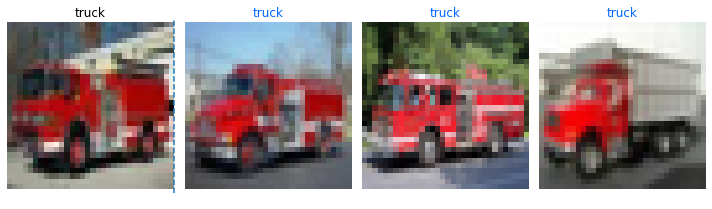

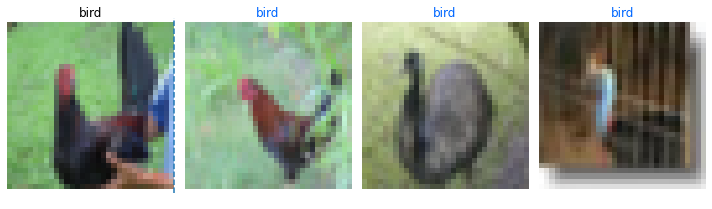

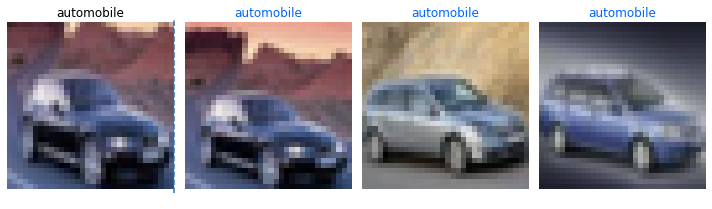

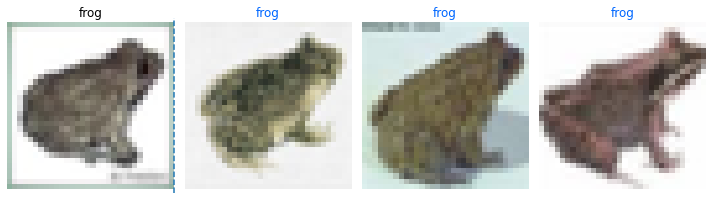

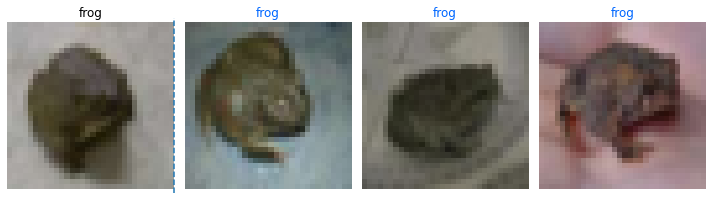

In [ ]:
for test_idx in all_idx:
    test_input = x_test[test_idx]
    label = exm.get_label_for(test_input)
    (examples, indices) = exm.return_nearest_examples(test_input, 3)
    plot_images(test_input, examples, label)